In [8]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split

## Parsing the data and checking the structure

In [2]:
corpus_df = pd.read_csv("corpus.tsv", sep="\t")
corpus_df.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


### Checking data contents

<BarContainer object of 2 artists>

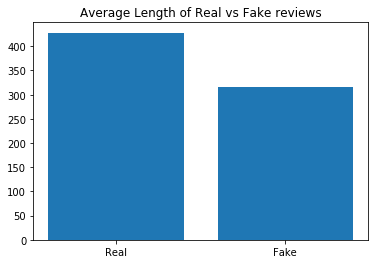

In [4]:
corpus_df['REVIEW_LENGTH'] = corpus_df.apply (lambda row: len(row["REVIEW_TEXT"]), axis=1)

fake_df = corpus_df[corpus_df['LABEL'] == "__label1__"] 
fake_len_avg = fake_df["REVIEW_LENGTH"].mean()
real_df = corpus_df[corpus_df['LABEL'] == "__label2__"]
real_len_avg = real_df["REVIEW_LENGTH"].mean()

x = ["Real", "Fake"]
y = [real_len_avg, fake_len_avg]
ax1 = plt.subplot(1,1,1)
ax1.set_title("Average Length of Real vs Fake reviews")

ax1.bar(x, y)

<BarContainer object of 2 artists>

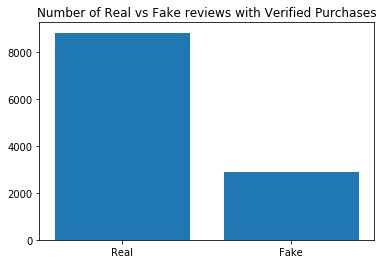

In [5]:
fake_df = corpus_df[corpus_df['LABEL'] == "__label1__"]
fake_df = fake_df[corpus_df['VERIFIED_PURCHASE'] == "Y"] 

real_df = corpus_df[corpus_df['LABEL'] == "__label2__"]
real_df = real_df[corpus_df['VERIFIED_PURCHASE'] == "Y"] 

x = ["Real", "Fake"]
y = [real_df.shape[0], fake_df.shape[0]]
ax = plt.subplot(1, 1, 1)
ax.set_title("Number of Real vs Fake reviews with Verified Purchases")

ax.bar(x, y)

<BarContainer object of 2 artists>

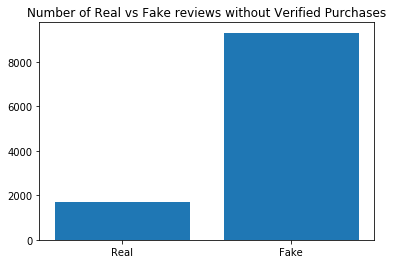

In [6]:
fake_df = corpus_df[corpus_df['LABEL'] == "__label1__"]
fake_df = corpus_df[corpus_df['VERIFIED_PURCHASE'] == "N"] 

real_df = corpus_df[corpus_df['LABEL'] == "__label2__"]
real_df = real_df[real_df['VERIFIED_PURCHASE'] == "N"] 

x = ["Real", "Fake"]
y = [real_df.shape[0], fake_df.shape[0]]
ax = plt.subplot(1, 1, 1)
ax.set_title("Number of Real vs Fake reviews without Verified Purchases")

ax.bar(x, y)

### General look at the labels and categories
Change to seaborn, easier

In [14]:
color = sns.color_palette()

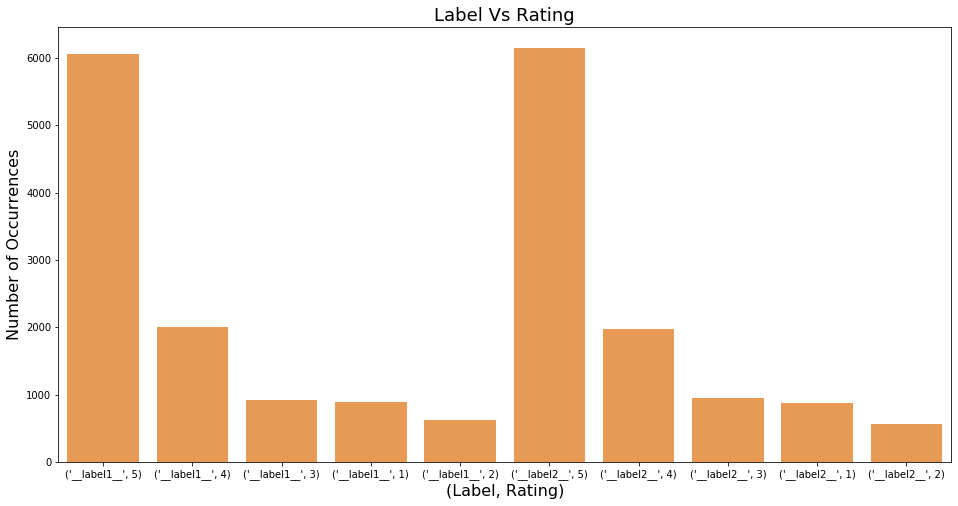

In [15]:
plt.figure(figsize=(16,8))
cnt_srs = corpus_df.groupby(corpus_df["LABEL"]).RATING.value_counts()

sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])

plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Label, Rating)', fontsize=16)
plt.title('Label Vs Rating', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

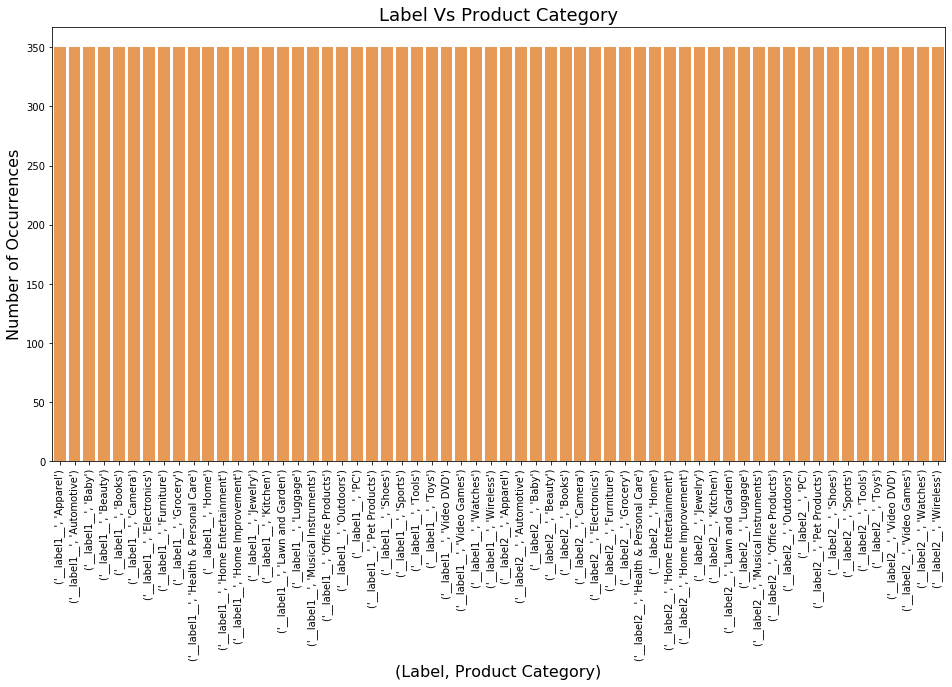

In [17]:
cnt_srs = corpus_df.groupby(corpus_df["LABEL"]).PRODUCT_CATEGORY.value_counts()
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Label, Product Category)', fontsize=16)
plt.title('Label Vs Product Category', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

### Checking for Stopwords

In [22]:
import nltk
nltk.download('stopwords')
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
def stopCount(x):
    sum =0
    for char in x.split():
        sum+= char in stop_words
    return sum

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Angelo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


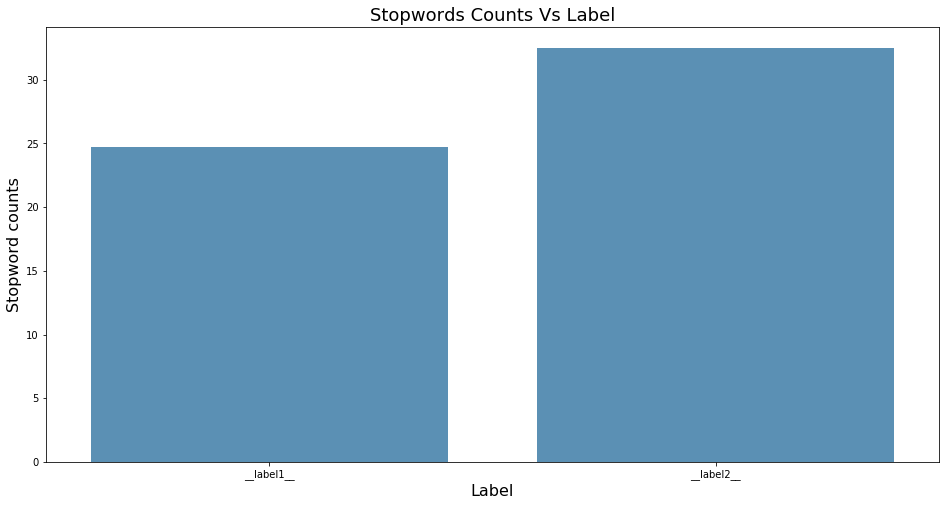

In [23]:
corpus_df['stop_count'] = corpus_df['REVIEW_TEXT'].apply(stopCount)
cnt_srs = corpus_df.groupby(["LABEL"]).stop_count.agg(lambda x: sum(x)/len(x))
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Stopword counts', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Stopwords Counts Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

### Capitilization vs label

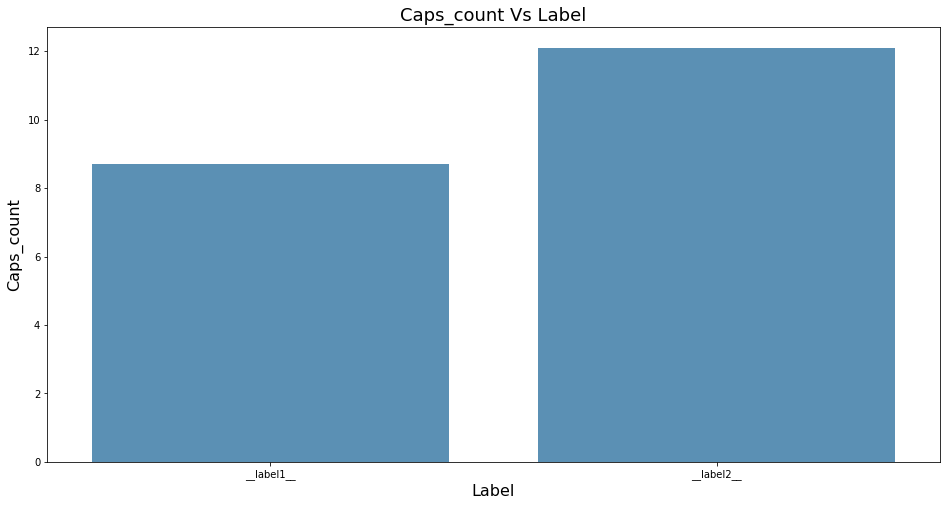

In [27]:
def capsCount(x):
    sum =0
    for char in x:
        sum+= char in "QWERTYUIOPASDFGHJKLZXCVBNM"
    return sum
corpus_df['caps_count'] = corpus_df['REVIEW_TEXT'].apply(capsCount)

cnt_srs = corpus_df.groupby(["LABEL"]).caps_count.agg(lambda x: sum(x)/len(x))

plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Caps_count', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Caps_count Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()